#데이터 정보
- Auction_key : 경매 아파트 고유 키값
- Auction_class : 경매구분 (강제 경매 / 임의 경매) **
- Bid_class : 입찰구분(일반/개별/일괄) **
- Claim_price : 경매 신청인의 청구 금액
- Appraisal_company : 감정사 **
- Appraisal_date : 감정일자
- Auction_count : 총 경매 횟수
- Auction_miscarriage_count : 총 유찰 횟수
- Total_land_gross_area : 총토지전체면적(㎡)
- Total_land_real_area : 총토지실면적(㎡)
- Total_land_auction_area : 총토지경매면적(㎡)
- Total_building_area : 총건물면적(㎡)
- Total_building_auction_area : 총건물경매면적(㎡)
- Total_appraisal_price : 총감정가
- Minimum_sales_price : 최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액
- First_auction_date : 최초경매일
*   Final_auction_date : 최종경매일
* Final_result : 최종결과
* Creditor : 채권자, 경매 신청인 **
* addr_do : 주소_시도 **
* addr_si :주소_시군구 **
* addr_dong : 주소_읍면동 **
* addr_li ** (대부분 Nan값)
* addr_san : 주소_산번지 여부(Y) 
* addr_bunji1
* addr_bunji2
* addr_etc
* Apartment_usage : 건물(토지)의 대표 용도
* Completion_date : 준공일
* Preserve_regist_date : 보존등기일, 건물을 신축하고 처음으로 등기
* Total_floor : 총층수
* Current_floor : 현재층수
* Specific : 기타_특이사항
* Share_auction_YorN : 지분경매 여부(Y), 하나의 부동산이 전체가 아닌 일부만 경매가 진행
* road_name
* road_bunji1
* road_bunji2
* Close_date : 종국일자 -> 종국X -> 날짜가 1111-11-11
* Close_result : 종국결과
* point.y : 위도
* point.x : 경도
* Hammer_price : 낙찰가

- train 1933 rows × 41 columns
- test  829 rows × 41 columns (Hammer_price : 낙찰가 = 0)

#데이터 전처리
- Final_result : 최종 결과 모두 낙찰이므로 행 삭제

In [1]:
!unzip Auction_master_kr.zip

Archive:  Auction_master_kr.zip
  inflating: Auction_rent.csv        
   creating: __MACOSX/
  inflating: __MACOSX/._Auction_rent.csv  
  inflating: Auction_submission.csv  
  inflating: __MACOSX/._Auction_submission.csv  
  inflating: Auction_master_test.csv  
  inflating: __MACOSX/._Auction_master_test.csv  
  inflating: Auction_master_train.csv  
  inflating: __MACOSX/._Auction_master_train.csv  
  inflating: Auction_regist.csv      
  inflating: __MACOSX/._Auction_regist.csv  
  inflating: Auction_result.csv      
  inflating: __MACOSX/._Auction_result.csv  


In [37]:
import pandas as pd
train = pd.read_csv("Auction_master_train.csv")
test = pd.read_csv("Auction_master_test.csv")

In [38]:
print(train.Final_result.unique())
print(test.Final_result.unique())
del train["Final_result"]
del test["Final_result"]
print(train.shape)

['낙찰']
['낙찰']
(1933, 40)


In [39]:
#addr_etc 행 제거 -> 위도 경도에서 정확한 위치 내포
# 도로명주소 제거 -> 번지 주소가 있음 
del train["addr_etc"]
del test["addr_etc"]

del train["road_name"]
del test["road_name"]

del train["road_bunji1"]
del test["road_bunji1"]

del train["road_bunji2"]
del test["road_bunji2"]

In [41]:
#Specific(기타사항)행 제거
del train["Specific"]
del test["Specific"]
print(train.shape)

(1933, 35)


In [43]:
#Auction_key 행 제거
del train["Auction_key"]
del test["Auction_key"]
print(train.shape)

(1933, 34)


In [47]:
#번지 자세한 주소가 큰 관여 할 것 같지 않음 (추측)
del train["addr_bunji1"]
del test["addr_bunji1"]

del train["addr_bunji2"]
del test["addr_bunji2"]
print(train.shape)

(1933, 32)


In [111]:
train_x = train.loc[:, "Auction_class": "point.x"]
train_y = train["Hammer_price"]
test_x = test.loc[:, "Auction_class": "point.x"]


0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #"Appraisal_company"
label = ["Auction_class", "Bid_class", "Apartment_usage", "Close_result"]


for i in label :
  train_x[i] = le.fit_transform(train_x[i])
  test_x[i] = le.transform(test_x[i])

train_x["Appraisal_company"] = le.fit_transform(train_x["Appraisal_company"])
print(le.classes_)
#test_x[i] = le.transform(test_x[i])

TypeError: ignored

In [67]:
test

,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,Close_date,Close_result,point.y,point.x,Hammer_price,addr_dongli
0,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,244565981,100174000,2013-07-04 00:00:00,2016-05-27 00:00:00,Private,부산,동래구,낙민동,NaN,N,주상복합,1111-11-11 00:00:00,15,5,N,2017-06-29 00:00:00,배당,35.201112,129.088687,0,NaN
1,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,Private,부산,동래구,낙민동,NaN,N,주상복합,1111-11-11 00:00:00,15,6,N,2017-06-29 00:00:00,배당,35.201112,129.088687,0,NaN
2,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,Private,부산,동래구,낙민동,NaN,N,주상복합,1111-11-11 00:00:00,15,8,N,2017-06-29 00:00:00,배당,35.201112,129.088687,0,NaN
3,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,Private,부산,동래구,낙민동,NaN,N,주상복합,1111-11-11 00:00:00,15,9,N,2017-06-29 00:00:00,배당,35.201112,129.088687,0,NaN
4,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,Private,부산,동래구,낙민동,NaN,N,주상복합,1111-11-11 00:00:00,15,11,N,2017-06-29 00:00:00,배당,35.201112,129.088687,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,강제,개별,4249164200,강림감정,2017-06-12 00:00:00,2,1,3460.9,13.87,13.87,84.91,84.91,420000000,336000000,2017-11-27 00:00:00,2017-12-26 00:00:00,서희건설,서울,성북구,하월곡동,NaN,N,주상복합,2011-12-13 00:00:00,23,23,N,2018-02-28 00:00:00,배당,37.605407,127.027309,0,NaN
825,강제,일반,320000000,삼일감정,2017-06-27 00:00:00,2,1,13578.9,72.81,72.81,150.66,150.66,580000000,464000000,2017-12-18 00:00:00,2018-01-22 00:00:00,신용보증기금,서울,도봉구,방학동,NaN,N,아파트,2005-12-15 00:00:00,14,3,N,2018-03-29 00:00:00,배당,37.663305,127.039551,0,NaN
826,강제,일반,160000000,성북감정,2017-08-01 00:00:00,2,1,57491.8,34.03,34.03,49.77,49.77,293000000,234400000,2017-11-06 00:00:00,2017-12-04 00:00:00,Private,서울,중랑구,신내동,NaN,N,아파트,1996-05-08 00:00:00,12,5,N,2018-02-07 00:00:00,배당,37.614529,127.091109,0,NaN
827,임의,일반,230000000,생림감정,2017-09-28 00:00:00,1,0,27710.2,42.54,42.54,84.84,84.84,492000000,492000000,2018-01-29 00:00:00,2018-01-29 00:00:00,중소기업은행,서울,성북구,장위동,NaN,N,아파트,2009-02-19 00:00:00,17,16,N,2018-04-24 00:00:00,배당,37.620359,127.047071,0,NaN


In [ ]:
notnull_test = [212, 227, 231, 237, 256, 258, 263, 264, 267, 269, 272]
print(a)
for i in notnull_train_x:
  print(i)
  print(train.loc[i]["addr_dong"])
  train.loc[i]["addr_dong"] = train.loc[i]["addr_dong"]+train.loc[i]["addr_li"]
  print(train.loc[i]["addr_dong"])

In [103]:
 print(test.loc[212]["addr_dongli"])

TypeError: ignored

In [102]:
#addr_li 행 중 Null 값이 아닌 index 찾기
# 아래 코드 오류 발생
#notnull_train = train[train["addr_li"].notnull() == True].index
#notnull_test = test[test["addr_li"].notnull() == True].index
aafdsdfsdf = [46,  63,  72,  93, 103, 110, 181, 214, 249, 324, 336, 339, 340, 346, 411, 414, 456, 473, 550, 612, 618, 635, 639]

print(aafdsdfsdf)

#for i in notnull_test :


TypeError: ignored

In [91]:
notnull_test = train[train["addr_li"].notnull() == True].index
notnull_test 

Int64Index([ 46,  63,  72,  93, 103, 110, 181, 214, 249, 324, 336, 339, 340,
            346, 411, 414, 456, 473, 550, 612, 618, 635, 639],
           dtype='int64')

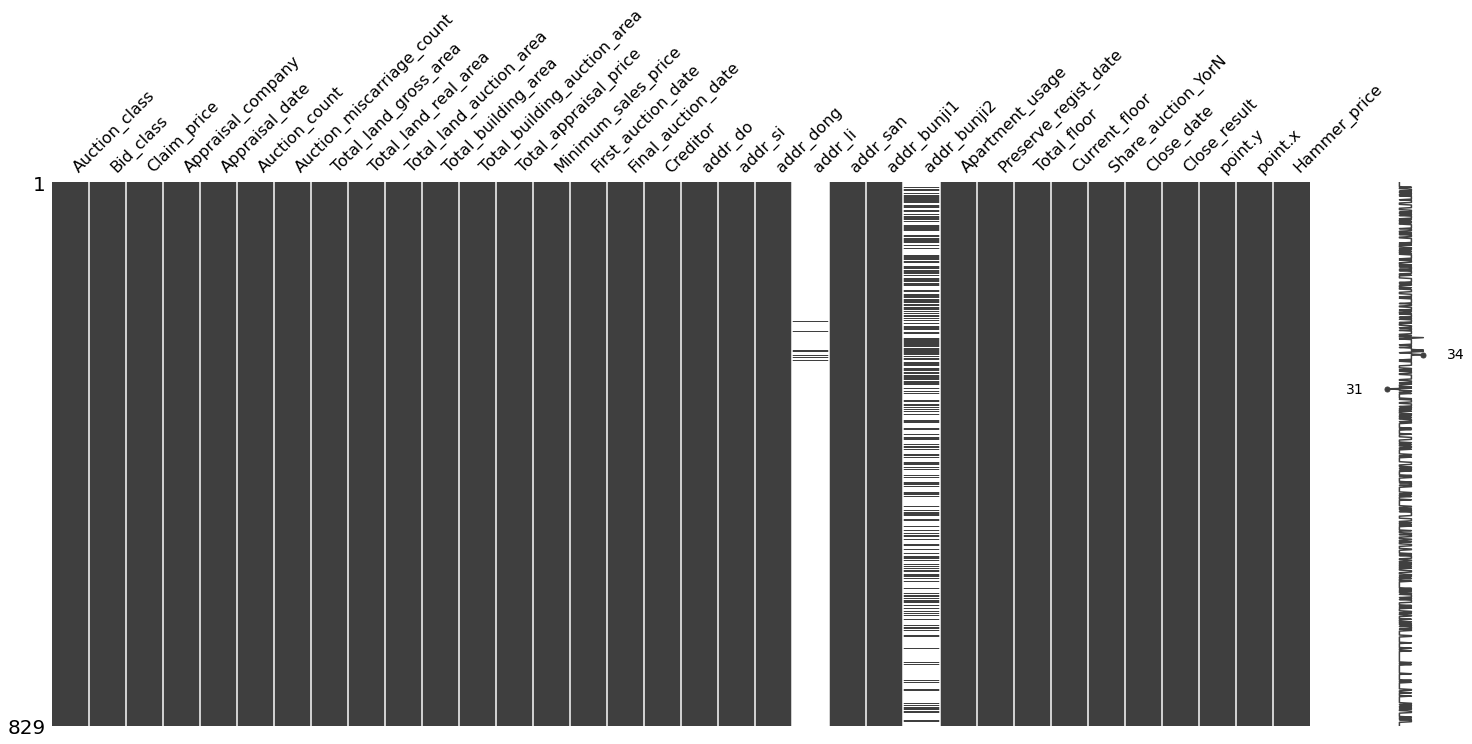

In [45]:
import missingno as msno
msno.matrix(test)

In [50]:
print(train.Close_result.unique())

['배당' '    ']


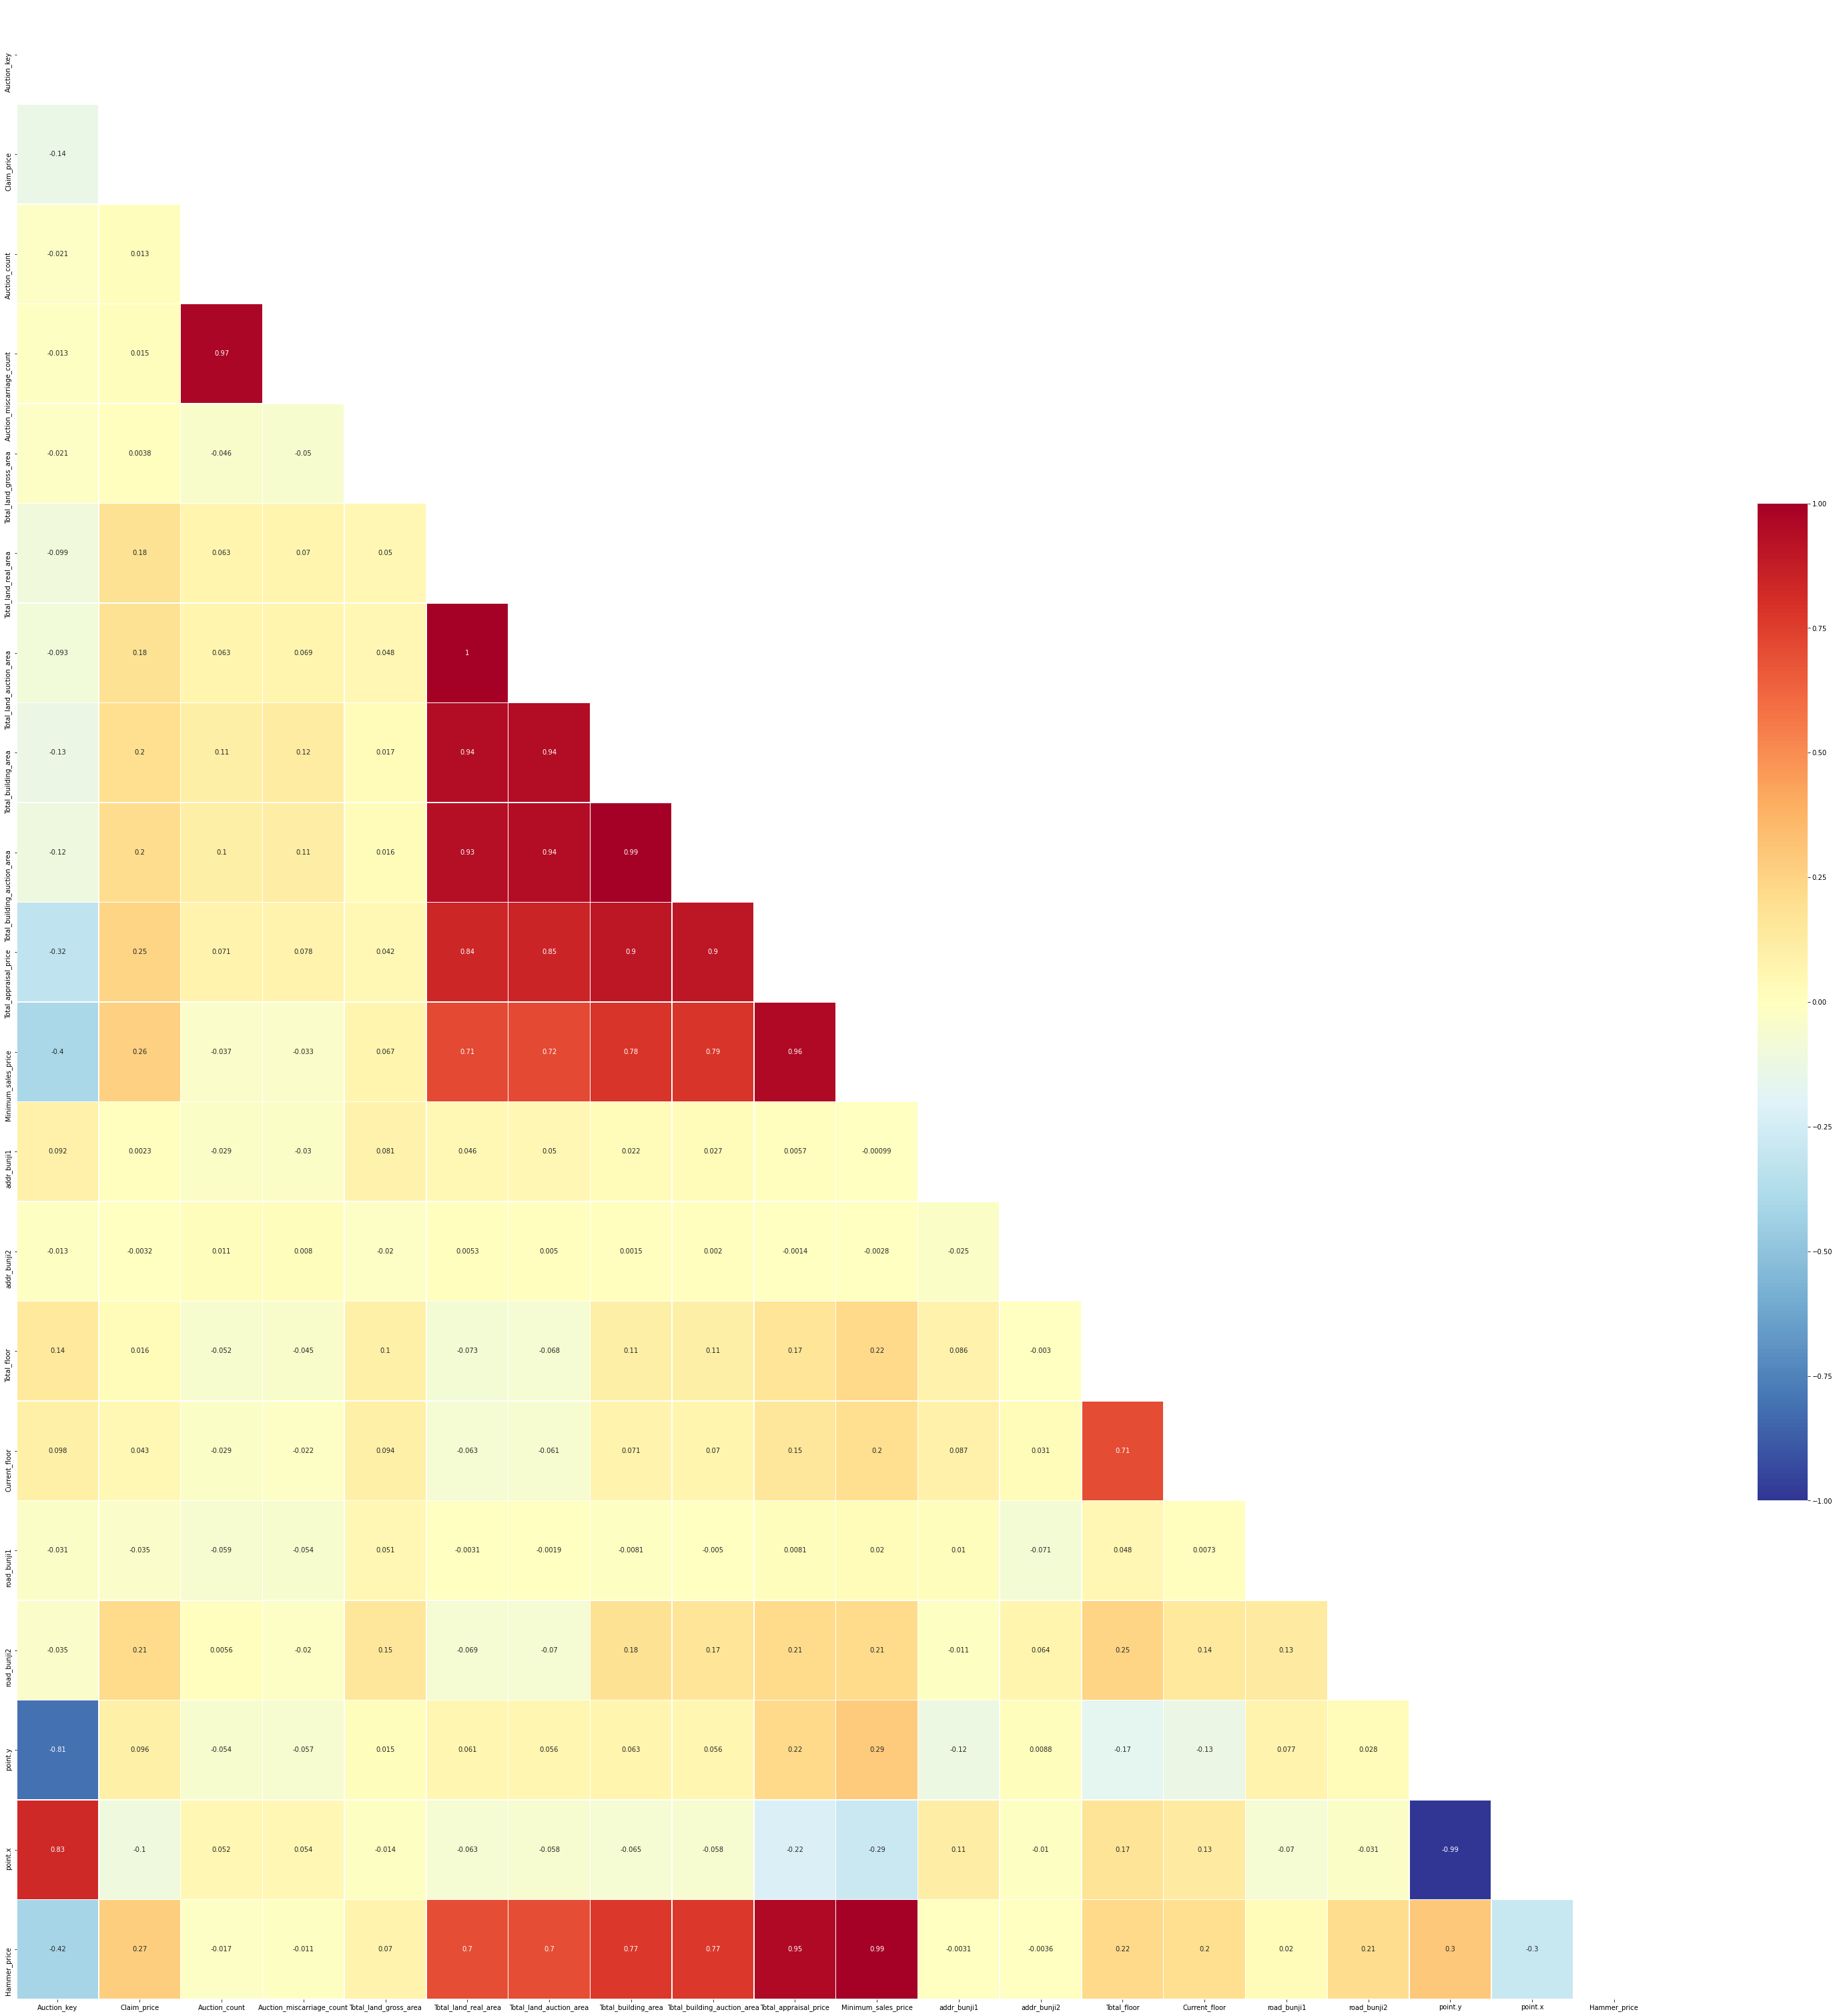

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = train.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(55,55) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

del train_x["sgg"] #병원의 시군구 자료
del train_x["receivableL1"] #장기미수금, 2017(회계년도)년 데이터를 의미함
del train_x["receivableL2"] #장기미수금, 2016(회계년도)년 데이터를 의미함